# Logistic Regression

#### 3.1 损失函数
损失函数的定义为:

$loss(w,b) = -\frac{1}{N}\cdot \sum_{i=1}^{N}[y_ilog(\hat{y_i})+(1-y_i)log(1-\hat{y_i})]$

#### 3.2 GD,SGD

### 3.2.1

**Gradient Descent algorithm:**

输入:样本数据$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\},y_i\in\{0,1\}$,梯度步长$\alpha$,迭代停止阈值$\epsilon$

输出:样本预测labels.

(1) 初始化参数$W,b$,两者都是向量形式,一般定义为一个很小的数字.

(2) 计算线性值:$Z=W\cdot X+b$

(3) sigma函数作用:$A=sigmoid(Z)$

(4) 计算损失函数:$loss(w,b) = -\frac{1}{N}\cdot \sum_{i=1}^{N}[y_ilog(\hat{y_i})+(1-y_i)log(1-\hat{y})]$

(5) 更新参数值:$W=W - \alpha \cdot dW,b=b-\alpha \cdot db$

(6) 重复(2)-(5)直到损失函数在阈值$\epsilon$内.退出迭代

## 代码实现

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import h5py

In [157]:
#第一步 加载数据集  使用的是鸢尾花的数据
def loadData_iris():
    
    iris = datasets.load_iris()
    X = iris.data[:100,:2]
    Y = iris.target[:100]
    return X,Y

In [158]:
X,Y = loadData_iris()

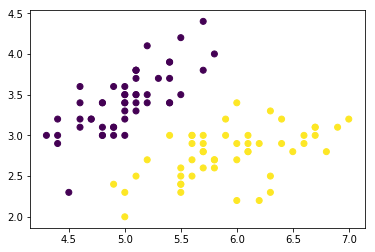

In [159]:
#绘制散点图
plt.scatter(X[:,0],X[:,1],c = y)

In [160]:
#数据集划分，按照不同比例划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

###  简单代码逻辑

In [165]:
m,n = X_train.shape

In [166]:
def sigmoid(Z):
    return 1./ (1. + np.exp(-Z))


In [167]:
A = sigmoid(Z)

In [168]:
def LR(X,y,Iter,alpha,epsilone):
    m,n = X.shape 
    W = np.zeros((1,n))
    b = 0
    costs = []
    for i in range(Iter):
        Z = np.dot(W,X.T) + b
        A = sigmoid(Z)
        loss = - np.sum(y * np.log(A) + (1-y)*np.log(1-A)) /m
        costs.append(loss)
        if loss <=epsilone:
            break
        dZ = A - y
        dW = np.dot(dZ,X) /m
        db = np.sum(dZ,axis=1,keepdims=True) /m
        
        W = W - alpha * dW
        b = b - alpha * db
    
    plt.plot(costs)
    plt.title('learning rate:{}'.format(alpha))
    plt.xlabel('#Iter')
    plt.ylabel('loss Value')
    plt.show()
    
    return W,b

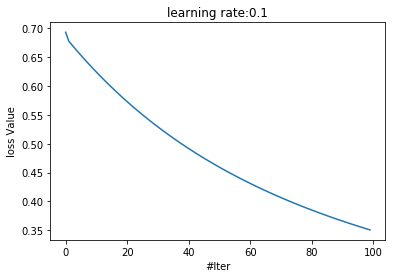

In [169]:
W,b = LR(X=X_train,y=y_train,Iter=100,alpha=0.1,epsilone=0.01)

In [170]:
def score(X,y,W,b):
    m,n = X.shape
    Z = np.dot(W,X.T) + b
    A = sigmoid(Z)
    predict = np.round(A)
    
    accuracy = (predict == y).sum() / m
    print(accuracy)

In [171]:
score(X_test,y_test,W,b)
score(X_train,y_train,W,b)

1.0
0.9875


In [18]:
#定义Sigmoid函数
def sigmoid(z):
    
    z = 1. / (1. + np.exp(-z))
    return z

In [19]:
#初始化w和b
def initial(n):
    np.random.seed(1)# 定义随机数种子
    w = np.random.rand(1,n)
    b = np.zeros((1,1))
    return w,b

In [27]:
#定义模型
def LR(X_train,y_train,alpha,Iter,is_print = False):
    m,n = X_train.shape
    w,b = initial(n)
    cost = []
    for iter_ in range(Iter):
        z = np.dot(w,X_train.T) + b
        A = sigmoid(z)
        loss =  - np.sum((y_train*np.log(A)+(1-y_train)*np.log(1-A)))/m
        cost.append(loss)
        
        #每十个打印一次
        if is_print and iter_ % 10==0:
            print("Iter:{},loss:{}".format(iter_,loss))
        dz = A - y_train
        
        dw = np.dot(dz,X_train)/m
        
        assert dw.shape == w.shape  # Make sure the shape is rigth.
        
        db = np.sum(dz,keepdims=True) /m
        
        assert db.shape == b.shape 
        
        # Update parameters.
        
        w = w - alpha * dw
        b = b - alpha * db
        
    return w,b,cost   

Iter:0,loss:2.3376619565017425
Iter:10,loss:0.7290024313496739
Iter:20,loss:0.6619149341556588
Iter:30,loss:0.604767868523125
Iter:40,loss:0.5559721498108738
Iter:50,loss:0.514128188700012
Iter:60,loss:0.4780474949987452
Iter:70,loss:0.44674378300711437
Iter:80,loss:0.4194094055631103
Iter:90,loss:0.39538731236084657


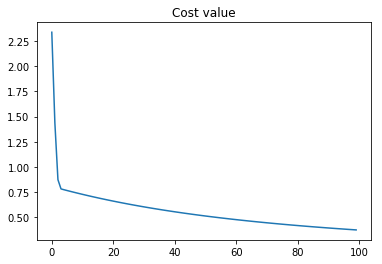

In [29]:
#调用函数
w,b,cost = LR(X_train,y_train,0.1,100,is_print=True)
plt.plot(cost);plt.title('Cost value');

In [30]:
def Predict(X_test,y_test,W,b):
    
    Z = np.dot(W,X_test.T) + b
    A = sigmoid(Z)
    
    predict_y = np.round(A) 
    
    correct_rate = np.sum((predict_y==y_test))/y_test.shape[0]
    
    return correct_rate

In [33]:
correct_rate = Predict(X_test,y_test,w,b)
print('The test set correct rate is:',correct_rate)

The test set correct rate is: 0.95


In [36]:
correct_rate = Predict(X_train,y_train,w,b)
print('The train set correct rate is:',correct_rate)

The train set correct rate is: 1.0


### 通过sklearn调用函数

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/home/zwx/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logreg_predict = logreg.predict(X_test)

In [40]:
accurate = (logreg_predict == y_test).sum() / y_test.shape[0]

print('the test set accurate is:',accurate)

the test set accurate is: 0.95


#### 数字识别系统逻辑回归

In [123]:
from __future__ import print_function

print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

Automatically created module for IPython interactive environment


In [124]:
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()

    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scalin
print(X.shape)
print(Y.shape)

#X_train, X_test, Y_train, Y_test = train_test_split(
    #X, Y, test_size=0.2, random_state=0)

(8985, 64)
(8985,)


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [126]:
Y_train.shape

(7188,)

In [127]:
def LR(X,y,Iter,alpha,epsilone):
    m,n = X.shape 
    W = np.zeros((1,n))
    b = 0
    costs = []
    for i in range(Iter):
        Z = np.dot(W,X.T) + b
        A = sigmoid(Z)
        loss = - np.sum(y * np.log(A) + (1-y)*np.log(1-A)) /m
        costs.append(loss)
        print(loss)
        if loss <=epsilone:
            break
        dZ = A - y
        dW = np.dot(dZ,X) /m
        db = np.sum(dZ,axis=1,keepdims=True) /m
        
        W = W - alpha * dW
        b = b - alpha * db
    
    plt.plot(costs)
    plt.title('learning rate:{}'.format(alpha))
    plt.xlabel('#Iter')
    plt.ylabel('loss Value')
    plt.show()
    
    return W,b

0.6931471805599454
-7.644153330934172


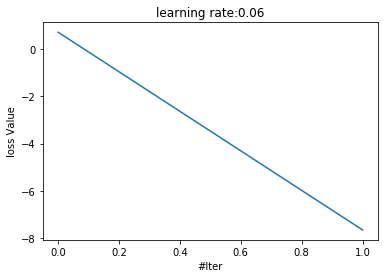

In [129]:
W,b = LR(X=X_train,y=Y_train,Iter=500,alpha=0.06,epsilone=0.01)

In [130]:
def score(X,y,W,b):
    m,n = X.shape
    Z = np.dot(W,X.T) + b
    A = sigmoid(Z)
    predict = np.round(A)
    
    accuracy = (predict == y).sum() / m
    print(accuracy)

In [131]:
score(X_test,Y_test,W,b)

0.10350584307178631


In [133]:
score(X_train,Y_train,W,b)

0.10072342793544797


### 超平面的确定

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
def loadData_iris():
    """
    Returns:
    --------
        X:have two dimensions (sepal length and width).
        Y:labels.
    """
    iris = datasets.load_iris()
    X = iris.data[:100, :2] 
    Y = iris.target[:100]
    return X,Y

In [3]:
X,y = loadData_iris()

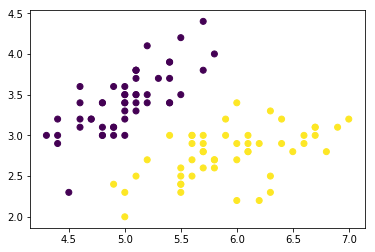

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

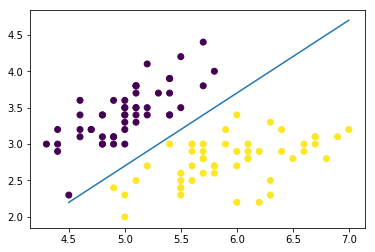

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
x= np.linspace(4.5,7)
plt.plot(x,x-2.3)
plt.show()